In [1]:
import numpy as np
import time
from tqdm import trange

eps = 1e-2
d = 5000
r = 200
G = np.random.randn(d, r)

# Naive computation vs smart computation (proposed in the paper)

Given a full-rank matrix $G \in \mathbb{R}^{d \times r}$, compute $\left(GG^T\right)^{-\frac{1}{2}}$. There are several ways to do it, let's compare their efficiencies.

## 1. Naive with SVD

$$
G = U\Sigma V^T
$$
$$
\left(GG^T\right)^{-\frac{1}{2}} = U_r\Sigma_r^{-1}U_r^T
$$

In [2]:
start_time = time.time()
U, sigma_r, V = np.linalg.svd(G)
U_r = U[:, :r]
result_naive_svd = np.eye(d) / eps + U_r @ (np.diag(1 / (sigma_r + eps)) - np.eye(r) / eps) @ U_r.T
print('Naive algorithm with SVD finished in {:.4f} seconds'.format(time.time() - start_time))

Naive algorithm with SVD finished in 2.7756 seconds


## 2. Smart with eigendecomposition

$$
G^TG = V\Sigma_r^2 V^T
$$
$$
U_r = GV\Sigma_r^{-1}
$$
$$
\left(GG^T\right)^{-\frac{1}{2}} = U_r\Sigma_r^{-1}U_r^T
$$

In [3]:
start_time = time.time()
sigma, V = np.linalg.eigh(G.T @ G)
sigma_r = np.sqrt(sigma[::-1])
V = np.fliplr(V)
U_r = G @ V @ np.diag(1 / sigma_r)
result_smart_eigen = np.eye(d) / eps + U_r @ (np.diag(1 / (sigma_r + eps)) - np.eye(r) / eps) @ U_r.T
print('Smart algorithm with eigendecomposition finished in {:.4f} seconds'.format(time.time() - start_time))

Smart algorithm with eigendecomposition finished in 0.4249 seconds


In [4]:
np.allclose(result_naive_svd, result_smart_eigen)

True

So the last method which was proposed in the paper is the most efficient way to perform a desired computation.

## 3. Plots

In [5]:
time_naive = []
time_smart = []
for d in trange(500, 10001, 500):
    G = np.random.randn(d, r)
    start_time = time.time()
    U, sigma_r, V = np.linalg.svd(G)
    U_r = U[:, :r]
    result_naive_svd = np.eye(d) / eps + U_r @ (np.diag(1 / (sigma_r + eps)) - np.eye(r) / eps) @ U_r.T
    time_naive.append(time.time() - start_time)

    start_time = time.time()
    sigma, V = np.linalg.eigh(G.T @ G)
    sigma_r = np.sqrt(sigma[::-1])
    V = np.fliplr(V)
    U_r = G @ V @ np.diag(1 / sigma_r)
    result_smart_eigen = np.eye(d) / eps + U_r @ (np.diag(1 / (sigma_r + eps)) - np.eye(r) / eps) @ U_r.T
    time_smart.append(time.time() - start_time)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:34<00:00, 10.60s/it]


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

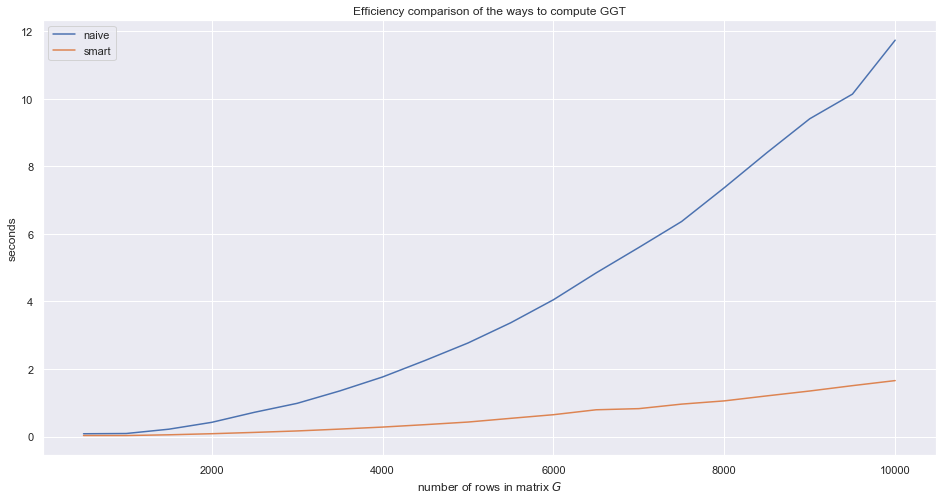

In [7]:
plt.figure(figsize=(16, 8))
plt.title('Efficiency comparison of the ways to compute GGT')
plt.plot(range(500, 10001, 500), time_naive, label='naive')
plt.plot(range(500, 10001, 500), time_smart, label='smart')
plt.legend(loc='best')
plt.xlabel('number of rows in matrix $G$')
plt.ylabel('seconds')
plt.show()